<a href="https://colab.research.google.com/github/AxelRK200/trend_finder_dataiku/blob/main/Exploration/STC_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairies

In [ ]:
!pip install yfinance
!pip install ta
     

In [2]:
import pandas as pd, numpy as np
from ta.trend import STCIndicator
import yfinance as yf

# Input

In [19]:
ndx = yf.Ticker("^NDX")
hist = ndx.history(period="max")

In [20]:
# Passe la date d'index à colonne
hist.reset_index(inplace=True)

In [21]:
hist.drop(columns=['High','Low','Dividends','Stock Splits'], inplace=True)

In [22]:
hist.tail()

,Date,Open,Close,Volume
9394,2023-01-09 00:00:00-05:00,11133.070312,11108.450195,5132190000
9395,2023-01-10 00:00:00-05:00,11069.049805,11205.780273,4710680000
9396,2023-01-11 00:00:00-05:00,11259.160156,11402.519531,5284390000
9397,2023-01-12 00:00:00-05:00,11441.450195,11459.610352,5681240000
9398,2023-01-13 00:00:00-05:00,11362.099609,11423.927734,421312671


### Mise en forme

In [23]:
hist["Date"] = hist.Date.apply(lambda d : d.strftime('%Y-%m-%d'))
hist["Open"] = hist.Open.apply(lambda f : round(f,2))
hist["Close"] = hist.Close.apply(lambda f : round(f,2))

In [24]:
hist.tail()

,Date,Open,Close,Volume
9394,2023-01-09,11133.07,11108.45,5132190000
9395,2023-01-10,11069.05,11205.78,4710680000
9396,2023-01-11,11259.16,11402.52,5284390000
9397,2023-01-12,11441.45,11459.61,5681240000
9398,2023-01-13,11362.10,11423.93,421312671


# Indicateur technique

In [25]:
hist.isnull().sum()

Date      0
Open      0
Close     0
Volume    0
dtype: int64

In [26]:
s_stc = STCIndicator(close=hist.Close, window_slow=50, window_fast=27, cycle=80).stc()

In [27]:
hist["STC"] = s_stc

In [28]:
hist.tail()

,Date,Open,Close,Volume,STC
9394,2023-01-09,11133.07,11108.45,5132190000,79.863872
9395,2023-01-10,11069.05,11205.78,4710680000,82.289194
9396,2023-01-11,11259.16,11402.52,5284390000,85.687862
9397,2023-01-12,11441.45,11459.61,5681240000,90.313609
9398,2023-01-13,11362.10,11423.93,421312671,95.156805


In [29]:
import seaborn as sns

In [30]:
sns.set(rc = {'figure.figsize':(14, 4)})

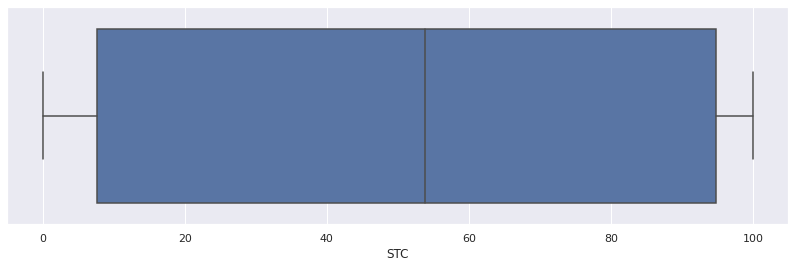

In [31]:
sns.boxplot(x=hist["STC"])

In [32]:
# Valeurs par défaut ?
s_stc_hist = STCIndicator(close=hist.Close).stc()
hist["STC_hist"] = s_stc_hist

In [33]:
hist.tail(10)

,Date,Open,Close,Volume,STC,STC_hist
9389,2022-12-30,10835.59,10939.76,3959030000,80.876952,0.019479
9390,2023-01-03,11038.42,10862.64,4780650000,81.259591,0.009739
9391,2023-01-04,10949.34,10914.80,5085380000,80.276650,0.004870
9392,2023-01-05,10837.25,10741.22,4764270000,78.856978,0.002435
9393,2023-01-06,10807.46,11040.35,5199780000,78.463450,38.142508
9394,2023-01-09,11133.07,11108.45,5132190000,79.863872,69.071254
9395,2023-01-10,11069.05,11205.78,4710680000,82.289194,84.535627
9396,2023-01-11,11259.16,11402.52,5284390000,85.687862,92.267813
9397,2023-01-12,11441.45,11459.61,5681240000,90.313609,96.133907
9398,2023-01-13,11362.10,11423.93,421312671,95.156805,98.066953


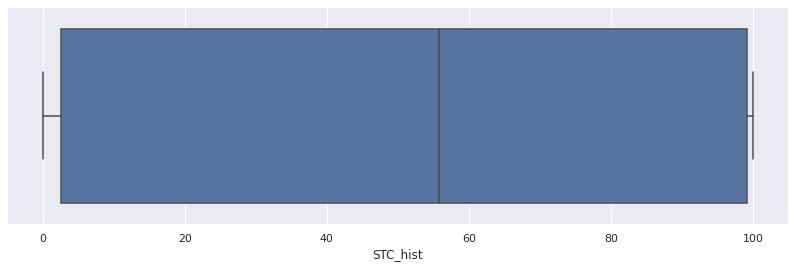

In [34]:
sns.boxplot(x=hist["STC_hist"])

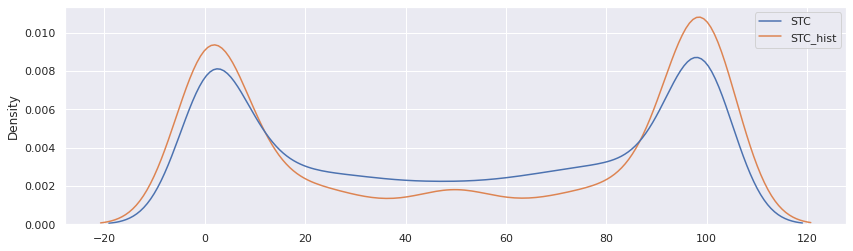

In [36]:
sns.kdeplot(data=hist[["STC","STC_hist"]])

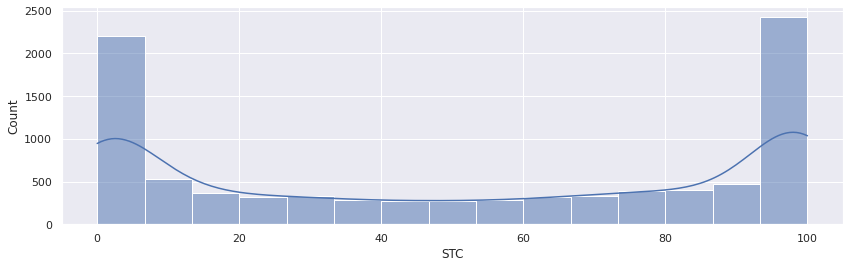

In [37]:
sns.histplot(data=hist, x=hist.STC, kde=True)